In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, accuracy_score
import math

# Loading mast data

We chose to go with the Risoe data, only loading the data that is needed, to reduce memory usage.

In [2]:
import netCDF4 as nc
import numpy as np
from datetime import datetime, timedelta

file_path_risoe = 'Data/Risoe/risoe_m_all.nc'
file_paths_borglum = 'Data/Borglum/borglum_all.nc'

signals_risoe = ['ws77', 'wd77', 'ws125', 'wd125']
signals_borglum = ['ws32', 'wd32']

base_date_borglum = datetime(1997, 12, 11, 16, 5, 0)
base_date_risoe = datetime(1995, 11, 20, 16, 25, 0)

# Get the Risoe dataset:
dataset = nc.Dataset(file_path_risoe, 'r')

# List the variables in the dataset
print("Variables in the netCDF file:")
for var_name in dataset.variables:
    print(var_name)

time_minutes = np.array(dataset.variables['time'])

# Convert time values to timestamp strings
time = []
for minutes in time_minutes:
	time_delta = timedelta(minutes=int(minutes))
	timestamp = base_date_risoe + time_delta
	time.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
 
print(f"time:\n {time[:10]} - {time[-1]}")

for signal in signals_risoe:
	values = np.array(dataset.variables[signal])
	print(f'{signal}:\n {values[:10]} - {values[-10:-1]}')

Variables in the netCDF file:
time
ws44
ws44_qc
ws77
ws77_qc
ws125
ws125_qc
wd77
wd77_qc
wd125
wd125_qc
t003
t003_qc
t044
t044_qc
t118
t118_qc
td01
td01_qc
rain
rain_qc
press
press_qc
rhum
rhum_qc
grad
grad_qc


C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_33252\2349137607.py:22: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  time_minutes = np.array(dataset.variables['time'])


time:
 ['1995-11-20 16:25:00', '1995-11-20 16:35:00', '1995-11-20 16:45:00', '1995-11-20 16:55:00', '1995-11-20 17:05:00', '1995-11-20 17:15:00', '1995-11-20 17:25:00', '1995-11-20 17:35:00', '1995-11-20 17:45:00', '1995-11-20 17:55:00'] - 2007-12-31 23:56:00
ws77:
 [3.36 3.05 3.59 3.87 4.74 4.91 4.98 5.39 5.76 5.52] - [8.14 8.71 6.82 7.26 7.24 6.04 6.97 8.17 6.66]
wd77:
 [205. 205. 204. 202. 201. 206. 203. 203. 193. 200.] - [0. 0. 0. 0. 0. 0. 0. 0. 0.]
ws125:
 [3.04 3.17 3.64 3.77 4.28 4.91 5.35 5.58 5.75 5.38] - [nan nan nan nan nan nan nan nan nan]
wd125:
 [208. 214. 209. 209. 212. 213. 210. 206. 207. 205.] - [0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_33252\2349137607.py:34: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  values = np.array(dataset.variables[signal])


In [3]:
import netCDF4 as nc
import numpy as np
import pandas as pd

# Make sure to use the correct dataset
file_path = 'Data/Risoe/risoe_m_all.nc'
dataset = nc.Dataset(file_path, 'r')

# Confirm variables are in the dataset
print("Variables in the netCDF file:")
for var_name in dataset.variables:
    print(var_name)

# Ensure the required variables exist before attempting to access them
required_vars = ['time', 'ws77', 'wd77', 'ws125', 'wd125']
for var in required_vars:
    if var not in dataset.variables:
        print(f"Variable {var} is missing in the dataset.")
    else:
        print(f"Variable {var} is available.")

# Convert NetCDF data to pandas DataFrame
df_mast_risoe = pd.DataFrame()
df_mast_risoe['time'] = pd.to_datetime([datetime(1995, 11, 20, 16, 25) + timedelta(minutes=int(m)) for m in dataset.variables['time'][:]])
df_mast_risoe['ws77'] = np.array(dataset.variables['ws77'][:])
df_mast_risoe['wd77'] = np.array(dataset.variables['wd77'][:]%360)
df_mast_risoe['ws125'] = np.array(dataset.variables['ws125'][:])
df_mast_risoe['wd125'] = np.array(dataset.variables['wd125'][:]%360)

# Setting the 'time' column as the index
df_mast_risoe.set_index('time', inplace=True)

# Display the last 25 rows to confirm data is loaded correctly
print(df_mast_risoe.tail(25))


Variables in the netCDF file:
time
ws44
ws44_qc
ws77
ws77_qc
ws125
ws125_qc
wd77
wd77_qc
wd125
wd125_qc
t003
t003_qc
t044
t044_qc
t118
t118_qc
td01
td01_qc
rain
rain_qc
press
press_qc
rhum
rhum_qc
grad
grad_qc
Variable time is available.
Variable ws77 is available.
Variable wd77 is available.
Variable ws125 is available.
Variable wd125 is available.
                      ws77  wd77  ws125  wd125
time                                          
2007-12-31 19:56:00   8.20   0.0    NaN    0.0
2007-12-31 20:06:00   7.51   0.0    NaN    0.0
2007-12-31 20:16:00   8.15   0.0    NaN    0.0
2007-12-31 20:26:00   8.48   0.0    NaN    0.0
2007-12-31 20:36:00   8.36   0.0    NaN    0.0
2007-12-31 20:46:00  10.50   0.0    NaN    0.0
2007-12-31 20:56:00   9.34   0.0    NaN    0.0
2007-12-31 21:06:00   7.85   0.0    NaN    0.0
2007-12-31 21:16:00   7.39   0.0    NaN    0.0
2007-12-31 21:26:00   8.94   0.0    NaN    0.0
2007-12-31 21:36:00   7.84   0.0    NaN    0.0
2007-12-31 21:46:00   9.21   0.0    N

making windroses to determine the wind speeds from directions. count based

Converting the data to a Pandas DataFrame, to make it easier to work with.
Converting time to datetime objects, and setting it as the index.

In [4]:
df_mast_risoe = pd.DataFrame()
df_mast_risoe['time'] = pd.to_datetime([datetime(1995, 11, 20, 16, 25) + timedelta(minutes=int(m)) for m in dataset.variables['time'][:]])
df_mast_risoe['ws77'] = np.array(dataset.variables['ws77'][:])
df_mast_risoe['wd77'] = np.array(dataset.variables['wd77'][:])
df_mast_risoe['ws125'] = np.array(dataset.variables['ws125'][:])
df_mast_risoe['wd125'] = np.array(dataset.variables['wd125'][:])

df_mast_risoe.set_index('time', inplace=True)

## Handleing missing values

Plotting the data so se where data is mussing

array([[<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>]], dtype=object)

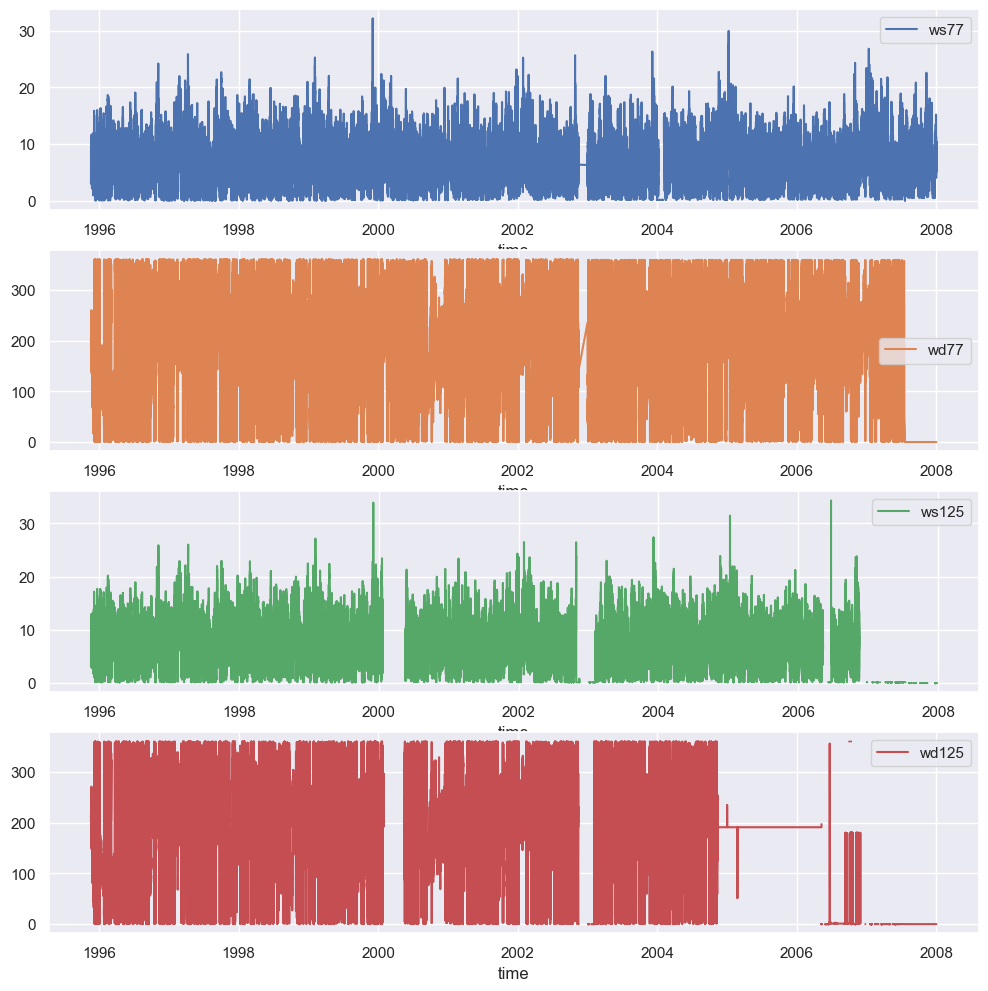

In [5]:
sns.set()
df_mast_risoe.plot(subplots=True, layout=(4,1), figsize=(12,12), sharex=False, sharey=False)

We chose to use height 77 to have more data points to work with.


In [6]:
df_mast_risoe.drop(inplace=True, columns=['wd125', 'ws125'])
df_mast_risoe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 628359 entries, 1995-11-20 16:25:00 to 2007-12-31 23:56:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ws77    621607 non-null  float64
 1   wd77    627811 non-null  float64
dtypes: float64(2)
memory usage: 14.4 MB


<Axes: xlabel='wd77'>

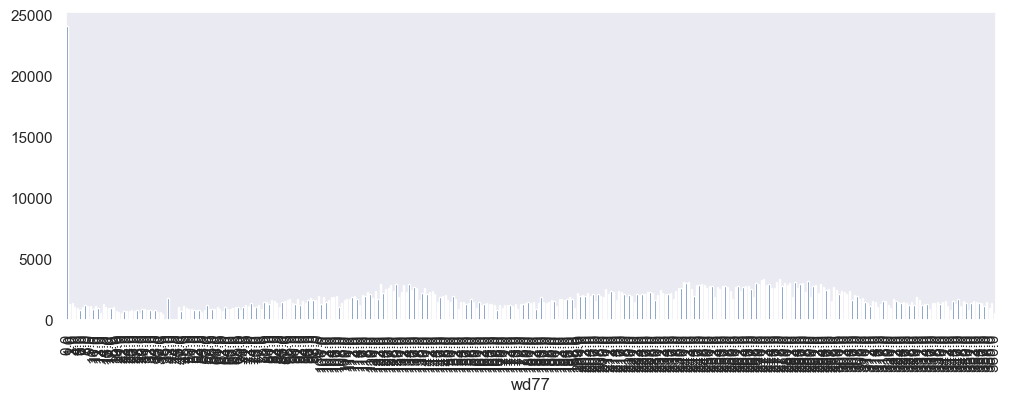

In [7]:
df_mast_risoe['wd77'].value_counts().sort_index().plot(kind='bar', figsize=(12,4), grid=False)

In [8]:

#Remove the last part of data where the wind direction is missing i.e. 0.0 for a long period of time

series = pd.Series(df_mast_risoe['wd77'])
non_zero = series.to_numpy().nonzero()
last_non_zero = non_zero[0][-1]

# remove all values after last non-zero value
df_mast_risoe = df_mast_risoe.iloc[:last_non_zero+1]

Doing a visual inspection of the data again to see results after removing missing values.

array([[<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>]], dtype=object)

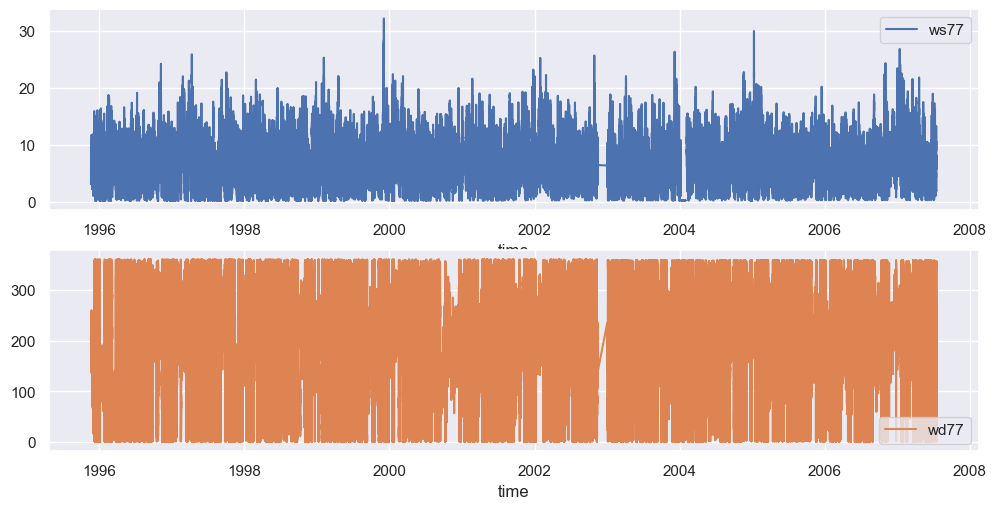

In [9]:
sns.set()
df_mast_risoe.plot(subplots=True, layout=(4,1), figsize=(12,12), sharex=False, sharey=False)

<Axes: xlabel='time'>

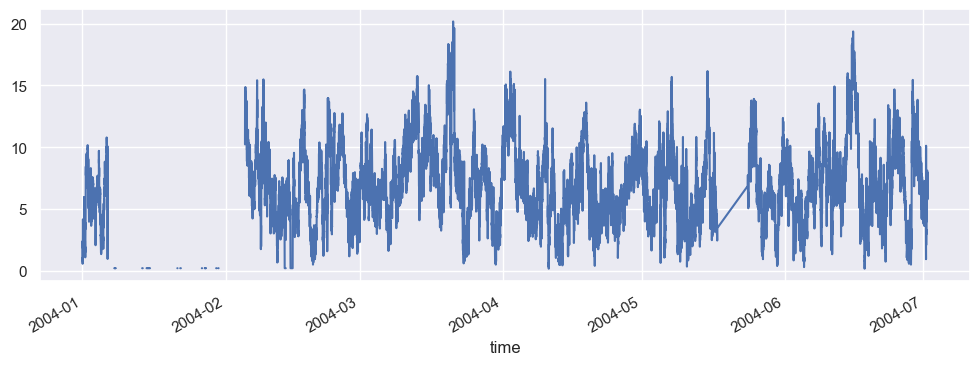

In [10]:
# plot the first 6 months of ws77 from the start of 2004

df_mast_risoe['2004-01-01':'2004-07-01']['ws77'].plot(figsize=(12,4), grid=True)

<Axes: xlabel='wd77'>

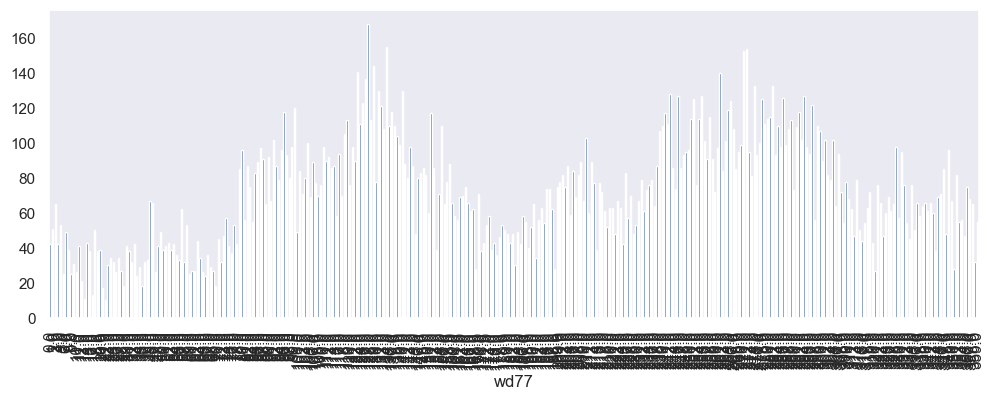

In [11]:
#Trying to display the missing data in a different way. To see if there were a lot of 0.0 measurements, but it is a lot of 0.2 which might still be valid.

df_mast_risoe['2004-01-01':'2004-07-01']['wd77'].value_counts().sort_index().plot(kind='bar', figsize=(12,4), grid=False)

In [12]:
# Showing amount of null values again

df_mast_risoe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604917 entries, 1995-11-20 16:25:00 to 2007-07-15 23:40:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ws77    598165 non-null  float64
 1   wd77    604369 non-null  float64
dtypes: float64(2)
memory usage: 30.0 MB


In [13]:

#Creating placeholder columns for dates to make it possible to do the transformation

df_mast_risoe['date_month_day_hour'] = df_mast_risoe.index.strftime('%m-%d %H')
df_mast_risoe['minute_first_digit'] = df_mast_risoe.index.minute // 10
df_mast_risoe['ws77'].fillna(df_mast_risoe.groupby(['date_month_day_hour', 'minute_first_digit'])['ws77'].transform('mean'), inplace=True)

C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_33252\1232396546.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mast_risoe['ws77'].fillna(df_mast_risoe.groupby(['date_month_day_hour', 'minute_first_digit'])['ws77'].transform('mean'), inplace=True)


In [14]:
#After the transformation we remove the help columns again
df_mast_risoe.drop(['date_month_day_hour', 'minute_first_digit'], axis=1, inplace=True)



<Axes: xlabel='time'>

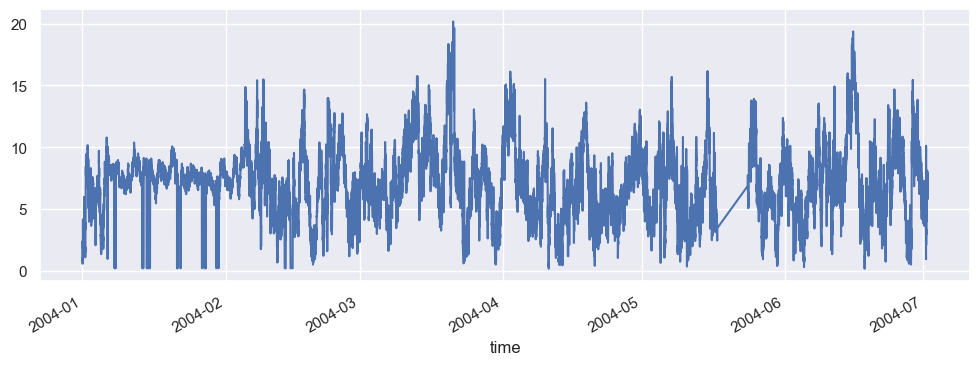

In [15]:


df_mast_risoe['2004-01-01':'2004-07-01']['ws77'].plot(figsize=(12,4), grid=True)

In [16]:
df_mast_risoe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604917 entries, 1995-11-20 16:25:00 to 2007-07-15 23:40:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ws77    604917 non-null  float64
 1   wd77    604369 non-null  float64
dtypes: float64(2)
memory usage: 30.0 MB


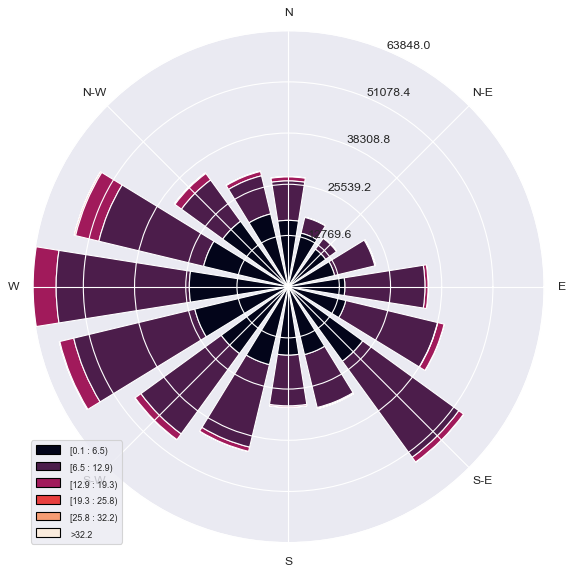

In [17]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

ws_risoe_77 = df_mast_risoe['ws77'].to_numpy()
wd_risoe_77 = df_mast_risoe['wd77'].to_numpy()

# Plot wind rose
ax = WindroseAxes.from_ax()
ax.bar(wd_risoe_77, ws_risoe_77)
ax.set_legend()

plt.show()

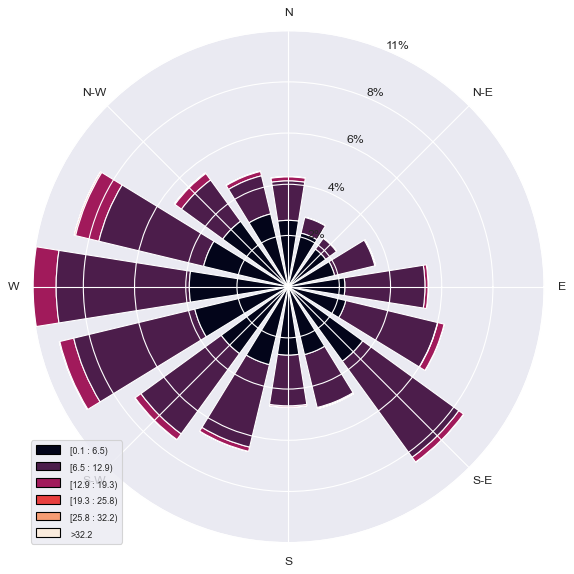

In [18]:
# Plot wind rose
ax = WindroseAxes.from_ax()
ax.bar(wd_risoe_77, ws_risoe_77, normed=True)
ax.set_legend()

# Format radius axis to percentages
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

plt.show()

In [19]:
# calculate ouliers

q1 = df_mast_risoe['ws77'].quantile(0.25)
q3 = df_mast_risoe['ws77'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
ws77_outlier_count = df_mast_risoe[(df_mast_risoe['ws77'] < lower_bound) | (df_mast_risoe['ws77'] > upper_bound)].count()['ws77']
print(f'ws77 outlier count: {ws77_outlier_count}')

ws77 outlier count: 9369


<Axes: xlabel='ws77'>

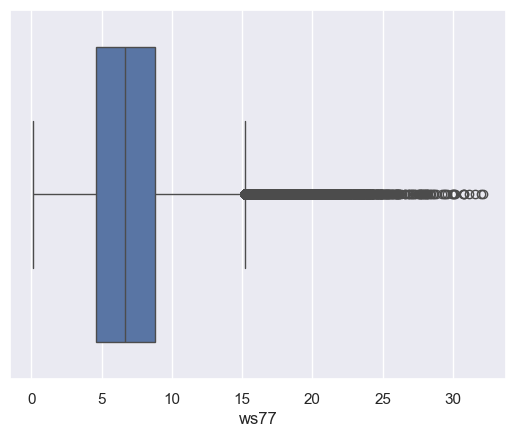

In [20]:
# boxplot to see outliers

sns.set()
sns.boxplot(x=df_mast_risoe['ws77'])

We chose to keep the outliers since wind speed does vary a lot and it is not a measurement error.
Plotting a histogram to visualize the distribution of the data. It looks close to a Wibull-distribution.

array([[<Axes: title={'center': 'ws77'}>,
        <Axes: title={'center': 'wd77'}>]], dtype=object)

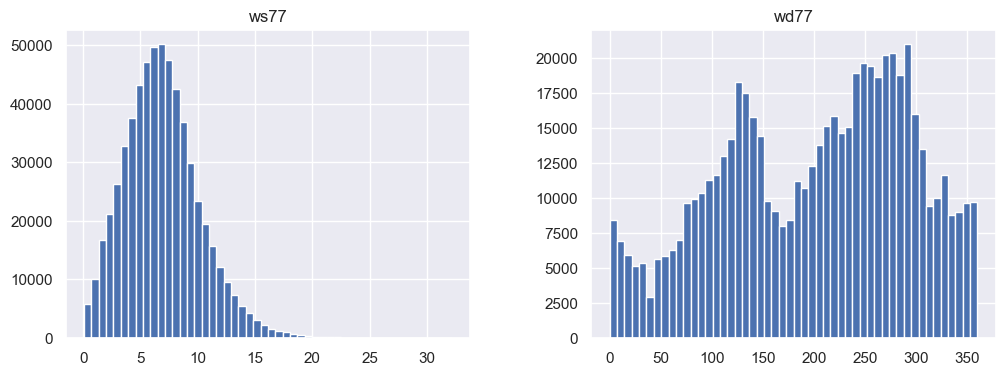

In [21]:
# show histogram of df_mast_risoe

df_mast_risoe.hist(bins=50, figsize=(12,4))

Converting Mast time to UTC


In [22]:
import pytz

# Reset index 
df_mast_risoe = df_mast_risoe.reset_index()

# Convert 'time' column to datetime format
df_mast_risoe['time'] = pd.to_datetime(df_mast_risoe['time'])

# Set timezone for Denmark and convert to UTC if 'time' is timezone-naive
# Made the if statement due to an error where the data was alreaddy transformed if this was run seperatly, else all code needed to be compiled again.
dk_time = pytz.timezone('Europe/Copenhagen')
if df_mast_risoe['time'].dt.tz is None:
    df_mast_risoe['time'] = df_mast_risoe['time'].dt.tz_localize(dk_time, nonexistent='shift_forward', ambiguous='NaT').dt.tz_convert('UTC')
else:
    df_mast_risoe['time'] = df_mast_risoe['time'].dt.tz_convert('UTC')

# Remove rows with any NaT values in 'time' after timezone conversion
df_mast_risoe = df_mast_risoe.dropna(subset=['time'])

# Set 'time' back as index if required
df_mast_risoe = df_mast_risoe.set_index('time')

print(df_mast_risoe)

                           ws77   wd77
time                                  
1995-11-20 15:25:00+00:00  3.36  205.0
1995-11-20 15:35:00+00:00  3.05  205.0
1995-11-20 15:45:00+00:00  3.59  204.0
1995-11-20 15:55:00+00:00  3.87  202.0
1995-11-20 16:05:00+00:00  4.74  201.0
...                         ...    ...
2007-07-15 21:00:00+00:00  5.19   75.0
2007-07-15 21:10:00+00:00  4.62  106.0
2007-07-15 21:20:00+00:00  3.31   86.0
2007-07-15 21:30:00+00:00  4.05   14.0
2007-07-15 21:40:00+00:00  1.87   47.0

[604851 rows x 2 columns]


In [23]:
# Checking if null values are added in the conversion

df_mast_risoe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604851 entries, 1995-11-20 15:25:00+00:00 to 2007-07-15 21:40:00+00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ws77    604851 non-null  float64
 1   wd77    604303 non-null  float64
dtypes: float64(2)
memory usage: 13.8 MB


Adding the missing WD data

In [24]:
# find index of nan values in wd77

nan_index = df_mast_risoe[df_mast_risoe['wd77'].isnull()].index

nan_index

DatetimeIndex(['1995-11-21 08:55:00+00:00', '1995-11-21 09:05:00+00:00',
               '1995-11-21 09:15:00+00:00', '1995-11-24 12:05:00+00:00',
               '1995-12-04 13:05:00+00:00', '1995-12-04 13:15:00+00:00',
               '1995-12-19 08:15:00+00:00', '1996-03-04 10:05:00+00:00',
               '1996-07-26 06:45:00+00:00', '1996-07-28 20:05:00+00:00',
               ...
               '2006-02-27 06:35:00+00:00', '2006-02-27 06:45:00+00:00',
               '2006-02-27 07:05:00+00:00', '2006-02-27 07:55:00+00:00',
               '2006-03-12 14:55:00+00:00', '2006-03-12 16:25:00+00:00',
               '2006-03-12 18:35:00+00:00', '2006-03-12 19:15:00+00:00',
               '2006-03-13 16:45:00+00:00', '2006-03-13 23:45:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=548, freq=None)

array([[<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>]], dtype=object)

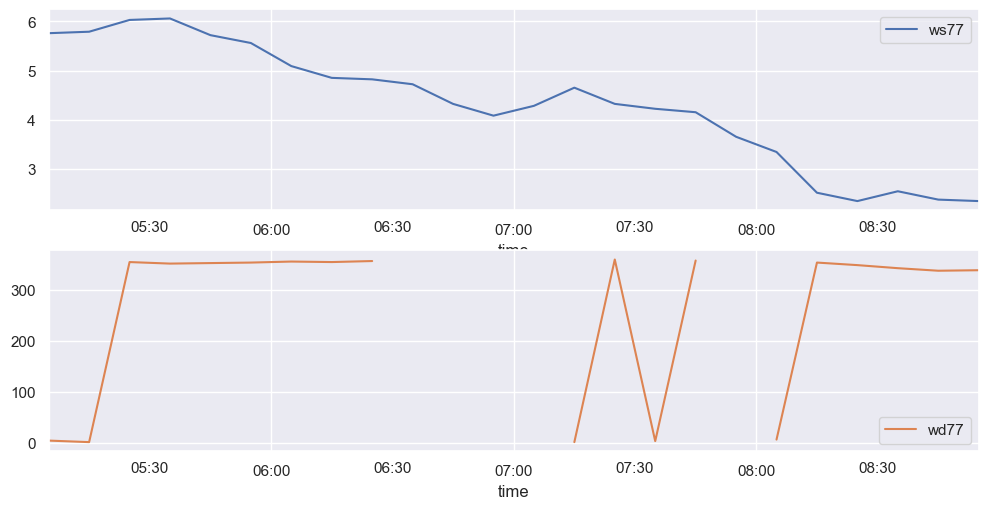

In [25]:
# plot before adding missing values ws77 and wd77 from 2006-02-27 07:20 to 2006-02-27 08:05

df_mast_risoe['2006-02-27 05:00':'2006-02-27 09:00'].plot(subplots=True, layout=(4,1), figsize=(12,12), sharex=False, sharey=False)

In [26]:
# adding missing WD values by linear interopolate

df_mast_risoe['wd77'] = df_mast_risoe['wd77'].interpolate(method='linear')

array([[<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>]], dtype=object)

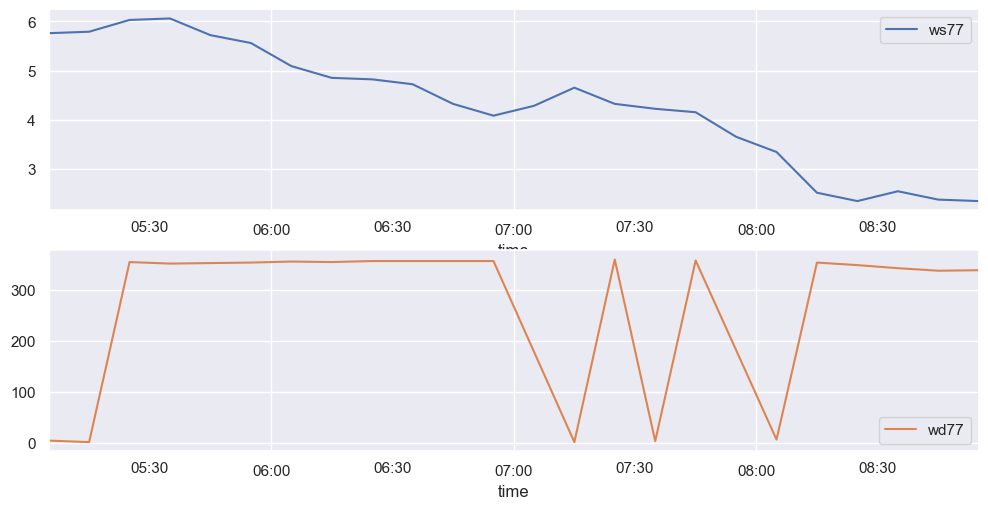

In [27]:
# Plotting again to se the full dataset

df_mast_risoe['2006-02-27 05:00':'2006-02-27 09:00'].plot(subplots=True, layout=(4,1), figsize=(12,12), sharex=False, sharey=False)

array([[<Axes: title={'center': 'ws77'}>,
        <Axes: title={'center': 'wd77'}>]], dtype=object)

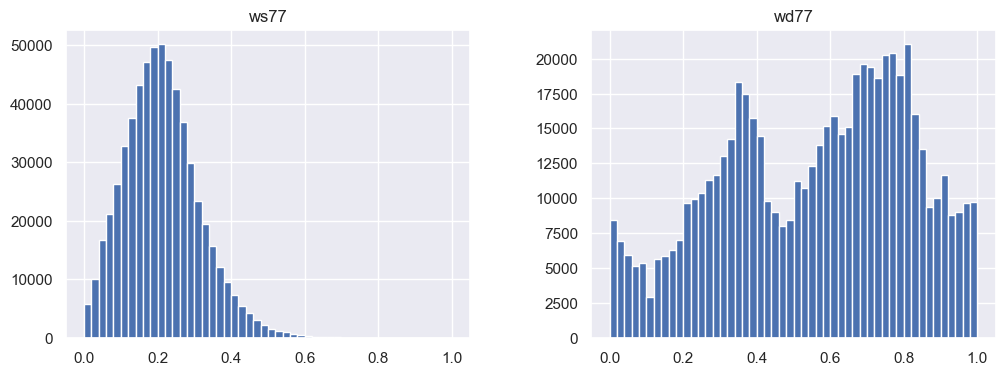

In [28]:
# Scaling the data since linear regresion works best on scaled data

scaled_df_mast_risoe = pd.DataFrame(MinMaxScaler().fit_transform(df_mast_risoe), columns=df_mast_risoe.columns, index=df_mast_risoe.index)

scaled_df_mast_risoe.hist(bins=50, figsize=(12,4))

In [29]:
# First we resample wind speed into a new dataframe column.

resampled_scaled_mast_risoe = pd.DataFrame()

# resample the ws77 data to 1 hour intervals 
resampled_scaled_mast_risoe['ws77'] = scaled_df_mast_risoe['ws77'].resample('1H').mean()


resampled_scaled_mast_risoe.dropna(inplace=True)
resampled_scaled_mast_risoe.head()

C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_33252\1752717651.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_scaled_mast_risoe['ws77'] = scaled_df_mast_risoe['ws77'].resample('1H').mean()


,ws77
time,
1995-11-20 15:00:00+00:00,0.105562
1995-11-20 16:00:00+00:00,0.160071
1995-11-20 17:00:00+00:00,0.193466
1995-11-20 18:00:00+00:00,0.225512
1995-11-20 19:00:00+00:00,0.245040


array([[<Axes: xlabel='time'>]], dtype=object)

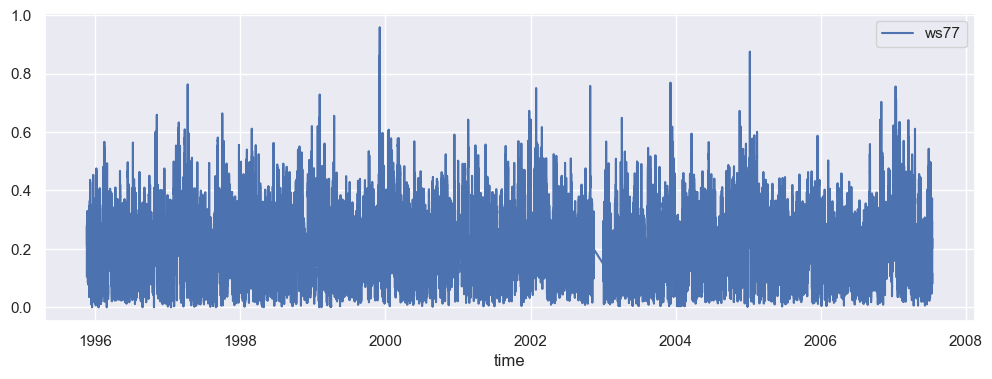

In [30]:
# plot resampled_scaled_mast_risoe to verify it looks similar to the plot before

resampled_scaled_mast_risoe.plot(subplots=True, layout=(1,1), figsize=(12,4), sharex=False, sharey=False)

Centering allows us to treat the average more intuitively because we can now think of all angles as being measured from a "central" point.
For instance, if we have angles of 350° and 10°:
After shifting:
350 deg becomes 170° (350 + 180 = 530; 530 % 360 = 170)
10deg  becomes 190° (10 + 180 = 190)

after this we shift the average back by subtracting 180° to return it to the original scale.
In our case, 180 deg becomes 0 deg after shifting back (180 - 180 = 0).

lets say the mean is 170 deg (170 -180 = -10) then we take mod 360 = 350. and now its refered to the original value of 350 deg


In [31]:
# Resample ws77 (wind speed) to hourly intervals
resampled_scaled_mast_risoe['ws77'] = scaled_df_mast_risoe['ws77'].resample('1H').mean()

# For wd77 (wind direction), use the circular mean approach without vectorization
def circular_mean(degrees_series):
    # Shift angles by 180 degrees to center them around the average
    shifted_degrees = (degrees_series + 180) % 360
    # Calculate the mean of the shifted angles and then shift back
    mean_direction = (shifted_degrees.mean() - 180) % 360
    return mean_direction

resampled_scaled_mast_risoe['wd77'] = scaled_df_mast_risoe['wd77'].resample('1H').apply(circular_mean)

C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_33252\3614018228.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_scaled_mast_risoe['ws77'] = scaled_df_mast_risoe['ws77'].resample('1H').mean()
C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_33252\3614018228.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_scaled_mast_risoe['wd77'] = scaled_df_mast_risoe['wd77'].resample('1H').apply(circular_mean)


In [32]:
# Verifying no errors are added in the dataset 

resampled_scaled_mast_risoe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100804 entries, 1995-11-20 15:00:00+00:00 to 2007-07-15 21:00:00+00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ws77    100804 non-null  float64
 1   wd77    100804 non-null  float64
dtypes: float64(2)
memory usage: 2.3 MB


array([<Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

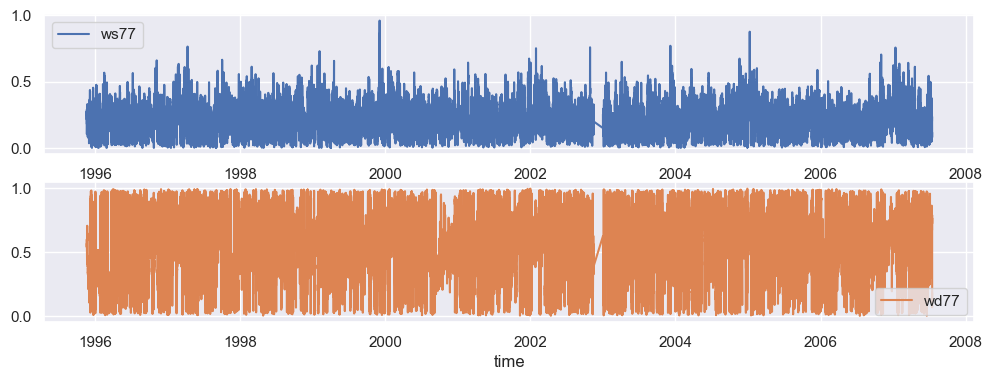

In [33]:
# plot resampled_scaled_mast_risoe

resampled_scaled_mast_risoe.plot(subplots=True, figsize=(12,4), sharex=False, sharey=False)

In [34]:
# MESO DATA Begins here.
# only load TIMESTAMP WSP060 WSP080 WDIR060 WDIR080
# convert TIMESTAMP to datetime and use it as index

meso_risoe = pd.read_csv('Data/Risoe/meso_Risoe.csv', usecols=['TIMESTAMP', 'WSP060', 'WSP080', 'WDIR060', 'WDIR080'], parse_dates=['TIMESTAMP'], index_col='TIMESTAMP')


# sort dataframe by index
meso_risoe.sort_index(inplace=True)

meso_risoe.head()

,WSP060,WSP080,WDIR060,WDIR080
TIMESTAMP,,,,
2000-01-01 07:00:00,5.40,5.83,208.02,209.09
2000-01-01 08:00:00,5.67,6.13,203.13,204.21
2000-01-01 09:00:00,6.12,6.69,203.82,204.75
2000-01-01 10:00:00,5.84,6.37,210.63,211.50
2000-01-01 11:00:00,5.56,6.20,216.27,217.37


array([<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>,
       <Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>],
      dtype=object)

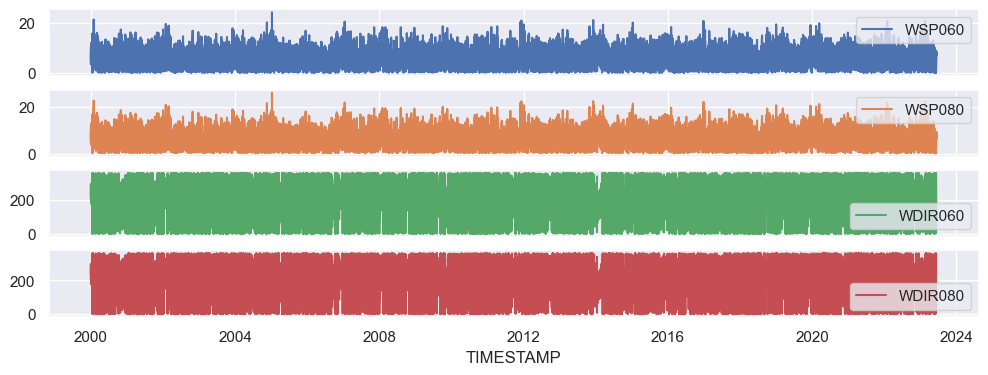

In [35]:
# plot meso_risoe
meso_risoe.plot(subplots=True, figsize=(12,4), sharex=False, sharey=False)

## Only using overlapping time period


In [36]:
# The meso data ain't ordered by time but by index

resampled_scaled_mast_risoe.index[0], resampled_scaled_mast_risoe.index[-1]

(Timestamp('1995-11-20 15:00:00+0000', tz='UTC'),
 Timestamp('2007-07-15 21:00:00+0000', tz='UTC'))

In [37]:
# To se the time span of the Meso data

meso_risoe.index[0], meso_risoe.index[-1]

(Timestamp('2000-01-01 07:00:00'), Timestamp('2023-06-11 06:00:00'))

array([<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>,
       <Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>],
      dtype=object)

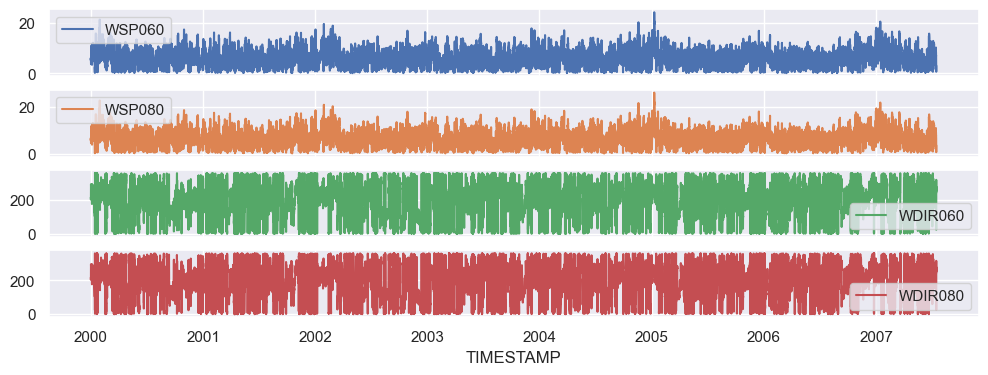

In [38]:
# Ensure meso_risoe has a timezone-aware index in UTC
meso_risoe.index = meso_risoe.index.tz_localize('UTC')

# Get the last index of resampled_scaled_mast_risoe
last_index = resampled_scaled_mast_risoe.index[-1]

# Slice meso_risoe to only include up to the last index of resampled_scaled_mast_risoe
meso_risoe_overlap = meso_risoe[:last_index]

# Plot overlap
meso_risoe_overlap.plot(subplots=True, figsize=(12, 4), sharex=False, sharey=False)

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

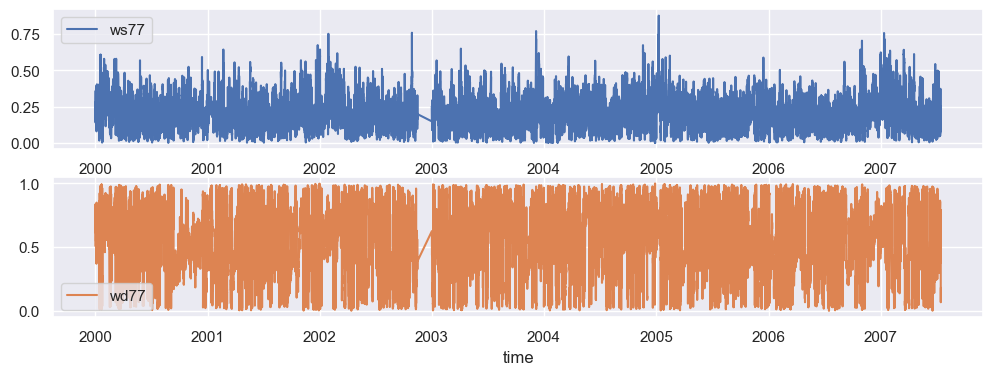

In [39]:
# Convert meso_risoe index to UTC if it's already timezone-aware
meso_risoe.index = meso_risoe.index.tz_convert('UTC')

# Get the first index of meso_risoe
first_index = meso_risoe.index[0]

# Slice resampled_scaled_mast_risoe from the first index of meso_risoe
resampled_scaled_mast_risoe_overlap = resampled_scaled_mast_risoe[first_index:]

# Plot the overlap
resampled_scaled_mast_risoe_overlap.plot(subplots=True, figsize=(12, 4), sharex=False, sharey=False)


# Interpolate the wind speed height

C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_33252\3837745770.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meso_risoe_overlap['WS077'] = (meso_risoe_overlap['WSP060'] * w_WS060) + (meso_risoe_overlap['WSP080'] * w_WS080)


array([<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>,
       <Axes: xlabel='TIMESTAMP'>], dtype=object)

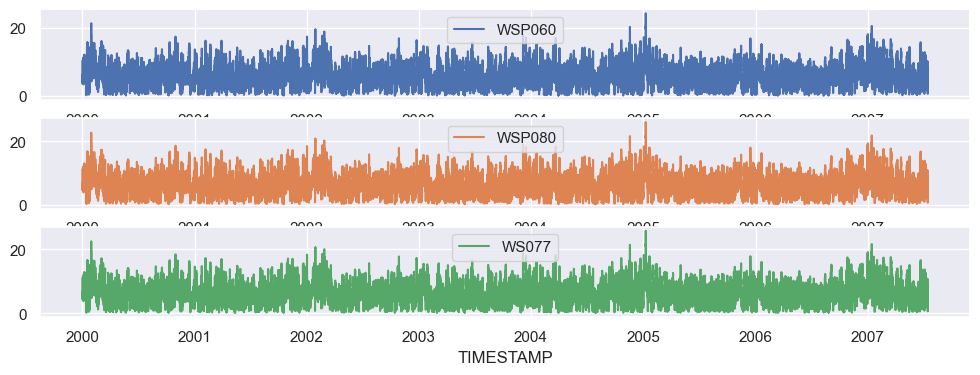

In [40]:
# interpolate the height to 77 for the MESO data. The plotting the difference between the interpolated WSP077 and the original WSP080

target_height = 77

# Calculate the interpolation weight for WS060 and WS080
w_WS060 = (80 - target_height) / (80 - 60)
w_WS080 = (target_height - 60) / (80 - 60)

# Linearly interpolate WS060 and WS080 to WS077
meso_risoe_overlap['WS077'] = (meso_risoe_overlap['WSP060'] * w_WS060) + (meso_risoe_overlap['WSP080'] * w_WS080)

# plot WS060 WS080 and WS077
meso_risoe_overlap[['WSP060', 'WSP080', 'WS077']].plot(subplots=True, figsize=(12,4), sharex=False, sharey=False)

In [41]:
print (meso_risoe)

                           WSP060  WSP080  WDIR060  WDIR080
TIMESTAMP                                                  
2000-01-01 07:00:00+00:00    5.40    5.83   208.02   209.09
2000-01-01 08:00:00+00:00    5.67    6.13   203.13   204.21
2000-01-01 09:00:00+00:00    6.12    6.69   203.82   204.75
2000-01-01 10:00:00+00:00    5.84    6.37   210.63   211.50
2000-01-01 11:00:00+00:00    5.56    6.20   216.27   217.37
...                           ...     ...      ...      ...
2023-06-11 02:00:00+00:00    7.37    8.28    84.76    86.03
2023-06-11 03:00:00+00:00    7.25    8.16    86.67    87.84
2023-06-11 04:00:00+00:00    6.80    7.61    88.92    89.99
2023-06-11 05:00:00+00:00    6.33    6.78    93.85    94.44
2023-06-11 06:00:00+00:00    6.14    6.49    98.16    98.74

[204288 rows x 4 columns]


<Axes: xlabel='TIMESTAMP'>

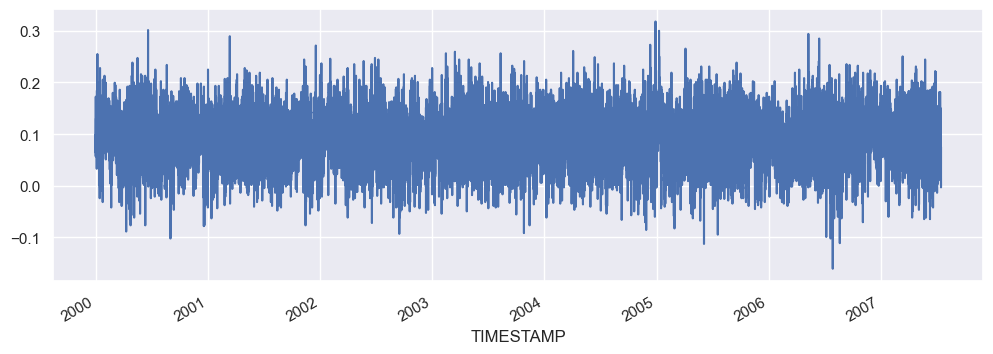

In [42]:
# plot the difference between WSP080 and WS077
(meso_risoe_overlap['WSP080'] - meso_risoe_overlap['WS077']).plot(figsize=(12,4), grid=True)

In [43]:
# Interpolation target height
target_height = 77

# calculate the interpolated wind direction as an angle weighted average of WDIR060 and WDIR080
# first convert the angles to radians
# then calculate the interpolation weight for WDIR060 and WDIR080
# then calculate the angle weighted average of WDIR060 and WDIR080

meso_risoe_overlap['WDIR060'] = np.radians(meso_risoe_overlap['WDIR060'])
meso_risoe_overlap['WDIR080'] = np.radians(meso_risoe_overlap['WDIR080'])

w_WDIR060 = (80 - target_height) / (80 - 60)
w_WDIR080 = (target_height - 60) / (80 - 60)

meso_risoe_overlap['WDIR077'] = (meso_risoe_overlap['WDIR060'] * w_WDIR060) + (meso_risoe_overlap['WDIR080'] * w_WDIR080)

# convret from radians to degrees

meso_risoe_overlap['WDIR077'] = np.degrees(meso_risoe_overlap['WDIR077'])

C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_33252\2622109770.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meso_risoe_overlap['WDIR060'] = np.radians(meso_risoe_overlap['WDIR060'])
C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_33252\2622109770.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meso_risoe_overlap['WDIR080'] = np.radians(meso_risoe_overlap['WDIR080'])
C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_33252\2622109770.py:15: SettingWithCopyWarning: 
A value 

array([<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>,
       <Axes: xlabel='TIMESTAMP'>], dtype=object)

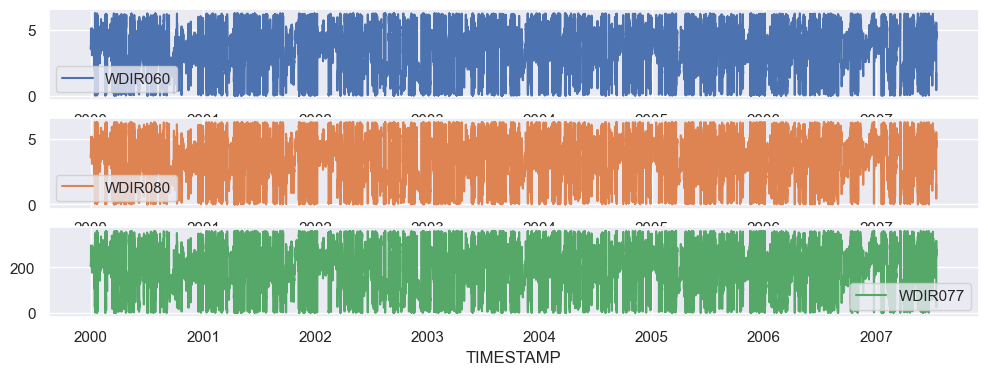

In [44]:
meso_risoe_overlap[['WDIR060', 'WDIR080', 'WDIR077']].plot(subplots=True, figsize=(12,4), sharex=False, sharey=False)

<Axes: xlabel='TIMESTAMP'>

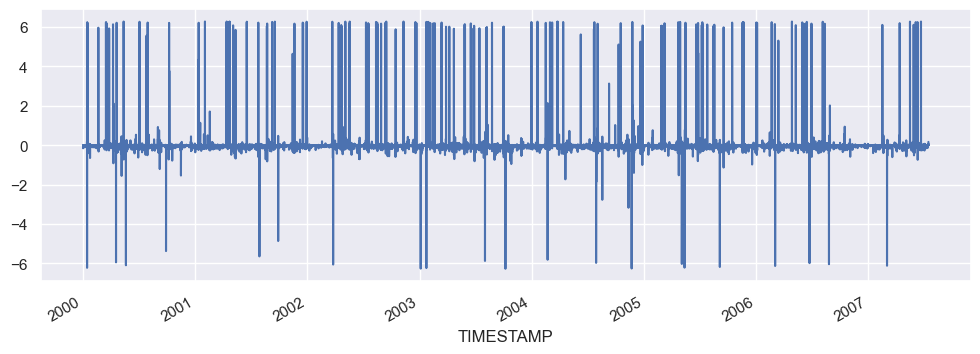

In [45]:
# plot the difference bewteen WDIR060 and WDIR080  

(meso_risoe_overlap['WDIR060'] - meso_risoe_overlap['WDIR080']).plot(figsize=(12,4), grid=True)

In [46]:
# join the two dataframes together

joined_df = pd.concat([resampled_scaled_mast_risoe_overlap, meso_risoe_overlap[['WS077', 'WDIR077']]], axis=1)

joined_df.dropna(inplace=True)

joined_df.head()

,ws77,wd77,WS077,WDIR077
2000-01-01 07:00:00+00:00,0.202348,0.509722,5.7655,208.9295
2000-01-01 08:00:00+00:00,0.190817,0.539352,6.0610,204.0480
2000-01-01 09:00:00+00:00,0.206347,0.561111,6.6045,204.6105
2000-01-01 10:00:00+00:00,0.219383,0.545833,6.2905,211.3695
2000-01-01 11:00:00+00:00,0.201361,0.558333,6.1040,217.2050


In [47]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64700 entries, 2000-01-01 07:00:00+00:00 to 2007-07-15 21:00:00+00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ws77     64700 non-null  float64
 1   wd77     64700 non-null  float64
 2   WS077    64700 non-null  float64
 3   WDIR077  64700 non-null  float64
dtypes: float64(4)
memory usage: 2.5 MB


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

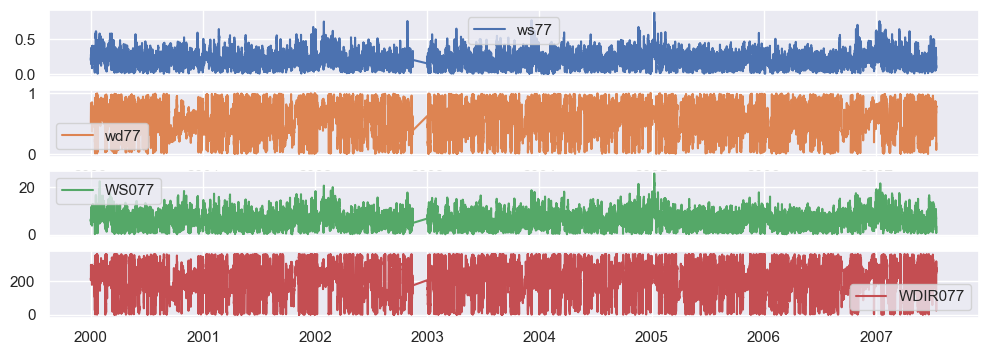

In [48]:
# plot joined_df

joined_df.plot(subplots=True, figsize=(12,4), sharex=False, sharey=False)

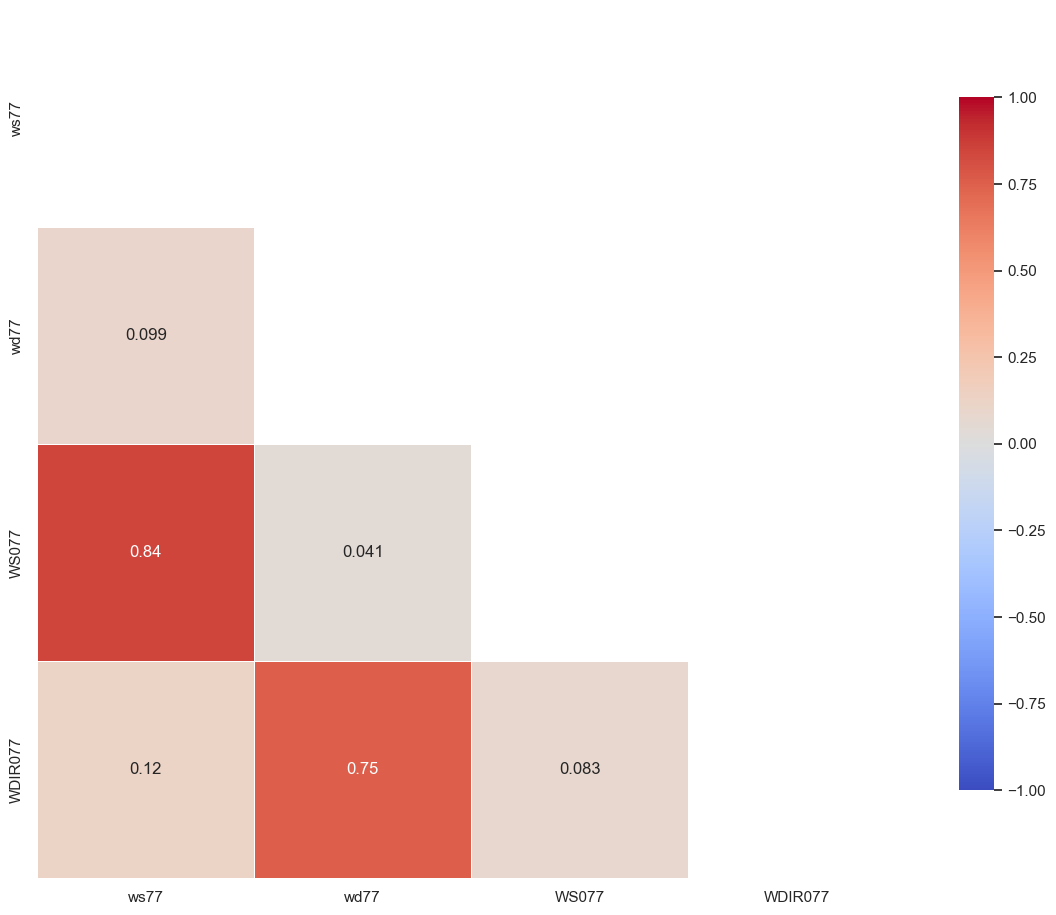

In [49]:
#  correlation matrix plot

# Set up the plot style
sns.set(style="white")

# Calculate the correlation matrix
corr = joined_df.corr()

# Set up the mask to only show one triangle of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a larger figure for better visibility of all features
plt.figure(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            annot=True, square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})

# Display the plot
plt.show()


# Distribution


array([[<Axes: title={'center': 'ws77'}>,
        <Axes: title={'center': 'wd77'}>],
       [<Axes: title={'center': 'WS077'}>,
        <Axes: title={'center': 'WDIR077'}>]], dtype=object)

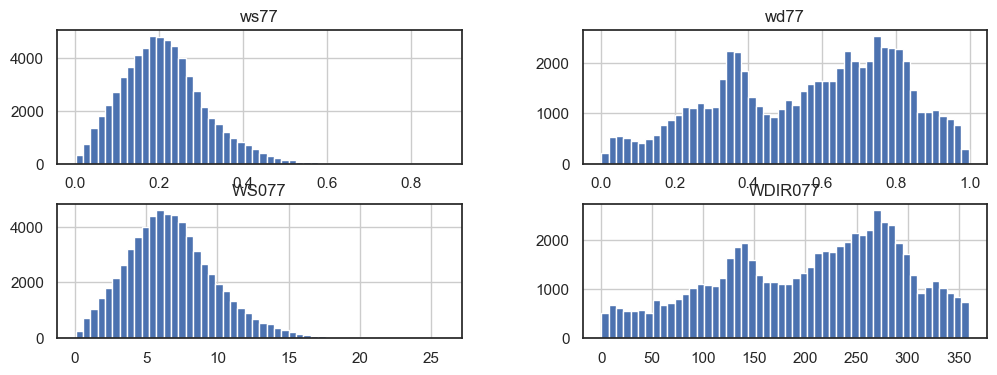

In [50]:
# plot histogram

joined_df.hist(bins=50, figsize=(12,4))

this looks like a Weibull distribution

more info https://en.wikipedia.org/wiki/Weibull_distribution

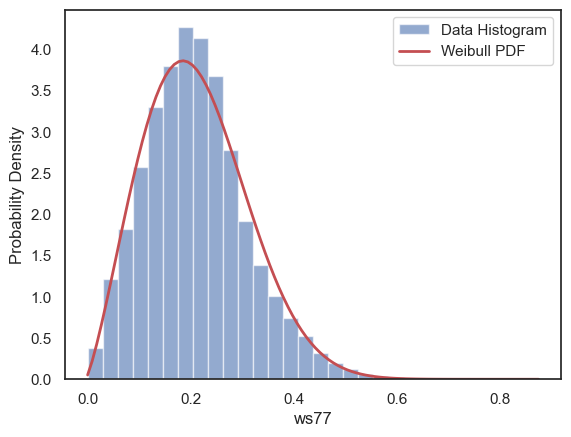

In [51]:
from scipy.stats import weibull_min

# Fit a Weibull distribution to the data
params = weibull_min.fit(joined_df['ws77'])

# Create a histogram of the data
plt.hist(joined_df['ws77'], bins=30, density=True, alpha=0.6, label='Data Histogram')

# Create a range of x values for the Weibull PDF
x = np.linspace(0, joined_df['ws77'].max(), 100)

# Calculate the Weibull PDF using the fitted parameters
pdf = weibull_min.pdf(x, *params)

# Plot the Weibull PDF on top of the histogram
plt.plot(x, pdf, 'r-', lw=2, label='Weibull PDF')

# Add labels and a legend
plt.xlabel('ws77')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()

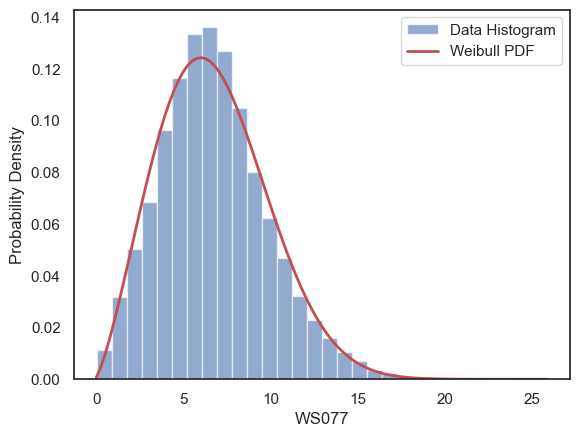

In [52]:
# Fit a Weibull distribution to the data
params = weibull_min.fit(joined_df['WS077'])

# Create a histogram of the data
plt.hist(joined_df['WS077'], bins=30, density=True, alpha=0.6, label='Data Histogram')

# Create a range of x values for the Weibull PDF
x = np.linspace(0, joined_df['WS077'].max(), 100)

# Calculate the Weibull PDF using the fitted parameters
pdf = weibull_min.pdf(x, *params)

# Plot the Weibull PDF on top of the histogram
plt.plot(x, pdf, 'r-', lw=2, label='Weibull PDF')

# Add labels and a legend
plt.xlabel('WS077')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()

In [53]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


y = joined_df['WS077']              
X = joined_df.drop(['WS077'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of alpha values to search
alpha_values = np.logspace(-4, 6, 1000)

# Create and fit the LassoCV model with tweaked parameters
lasso_cv_model = LassoCV(
    alphas=alpha_values,
    cv=10,
    fit_intercept=True,
    max_iter=8000,  # Increase max iterations
    tol=1e-5,       # Set a smaller tolerance
    random_state=42
)

lasso_cv_model.fit(X_train, y_train)

y_pred = lasso_cv_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Lasso: {mse}')

# Print the optimal alpha found by LassoCV
print(f'Optimal alpha found by LassoCV: {lasso_cv_model.alpha_}')

# Make predictions and calculate mean squared error
y_pred_cv = lasso_cv_model.predict(X_test)
mse_cv = mean_squared_error(y_test, y_pred_cv)
print(f'Mean Squared Error with Optimal Alpha from LassoCV: {mse_cv}')

print ('-----------------------------------------------------------------------------')
# Calculate and print R-squared for training and testing data
r2_train = lasso_cv_model.score(X_train, y_train)
r2_test = lasso_cv_model.score(X_test, y_test)
print(f'R-squared on training data is {r2_train}')  
print(f'R-squared on test data is {r2_test}')  

# Calculate Bias
bias = np.mean(y_pred - y_test)
print(f'Bias of LassoCV model: {bias}')

# Calculate Standard Deviation of Predictions
std_dev_predictions = np.std(y_pred)
print(f'Standard Deviation of Predictions for LassoCV: {std_dev_predictions}')




Mean Squared Error for Lasso: 2.6680333026729826
Optimal alpha found by LassoCV: 0.0001
Mean Squared Error with Optimal Alpha from LassoCV: 2.6680333026729826
-----------------------------------------------------------------------------
R-squared on training data is 0.7138496149477943
R-squared on test data is 0.7204265315005047
Bias of LassoCV model: -0.015519516291538148
Standard Deviation of Predictions for LassoCV: 2.6275916918330977


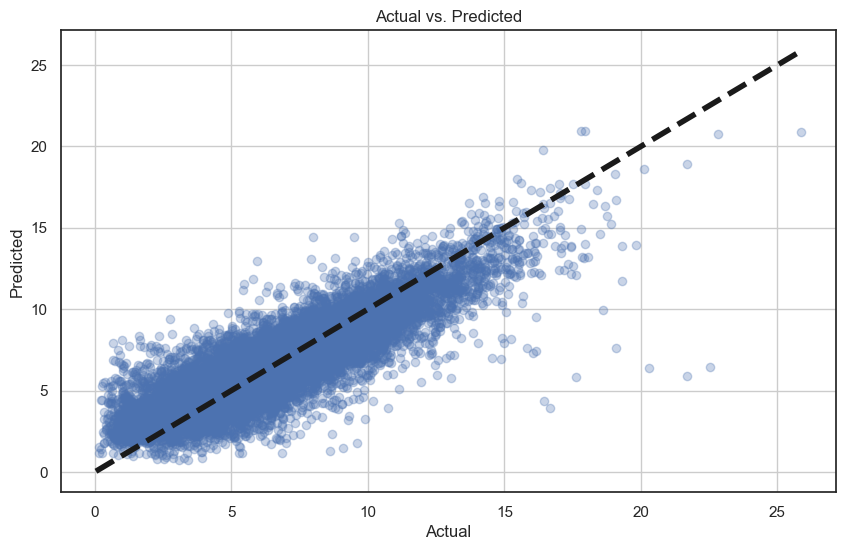

In [54]:
# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Feature')

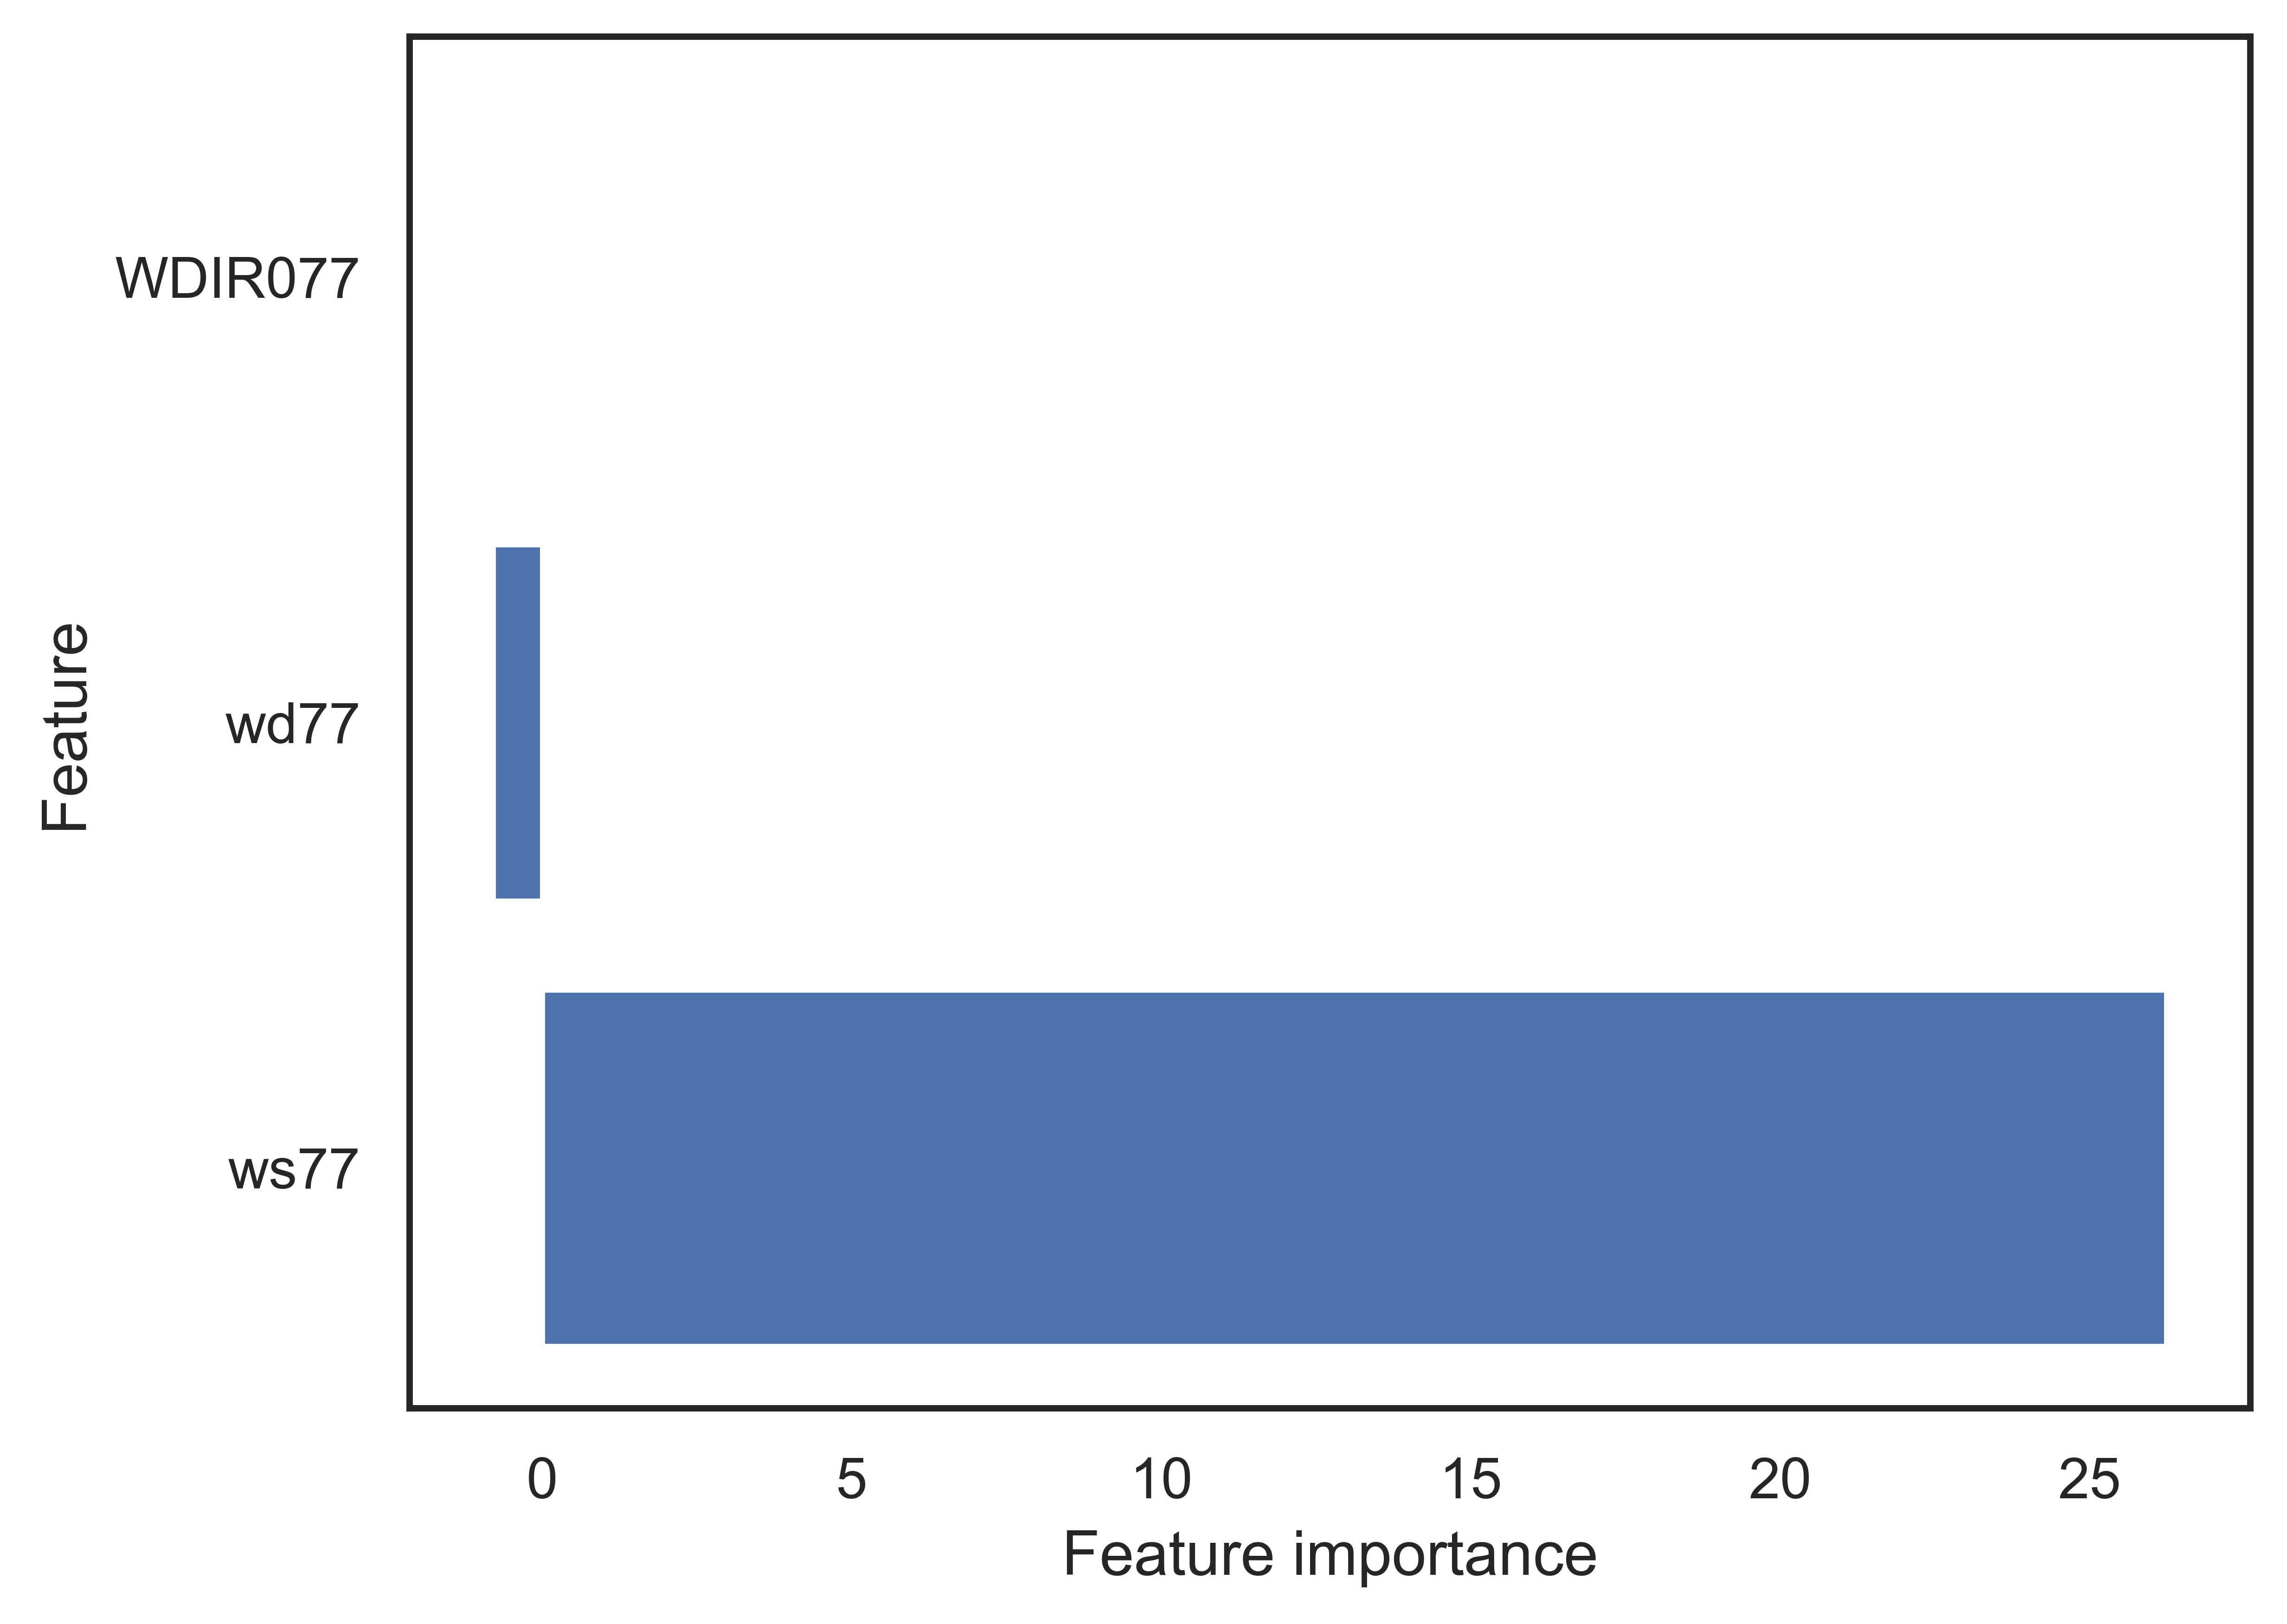

In [55]:
# A coeficent analasys
nfeatures = len(lasso_cv_model.coef_)
plt.figure(dpi = 800)
plt.barh(range(nfeatures), lasso_cv_model.coef_, align='center')
plt.yticks(np.arange(nfeatures), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

In [56]:
print (joined_df)

                               ws77      wd77   WS077   WDIR077
2000-01-01 07:00:00+00:00  0.202348  0.509722  5.7655  208.9295
2000-01-01 08:00:00+00:00  0.190817  0.539352  6.0610  204.0480
2000-01-01 09:00:00+00:00  0.206347  0.561111  6.6045  204.6105
2000-01-01 10:00:00+00:00  0.219383  0.545833  6.2905  211.3695
2000-01-01 11:00:00+00:00  0.201361  0.558333  6.1040  217.2050
...                             ...       ...     ...       ...
2007-07-15 17:00:00+00:00  0.079931  0.767593  1.6455  277.3020
2007-07-15 18:00:00+00:00  0.092812  0.340741  0.6130  316.0425
2007-07-15 19:00:00+00:00  0.105692  0.068981  2.9870   25.2590
2007-07-15 20:00:00+00:00  0.118469  0.143981  4.4530   38.6420
2007-07-15 21:00:00+00:00  0.116173  0.182222  3.4550   90.5865

[64700 rows x 4 columns]


In [57]:
# Trying a ridgeModel

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create and fit the ridgeCV model with tweaked parameters
ridge_cv_model = RidgeCV(
    alphas=alpha_values,
    cv=5,
    fit_intercept=True,
)

ridge_cv_model.fit(X_train, y_train)

y_pred_ridge = ridge_cv_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for RidgeCV: {mse}')

# Print the optimal alpha found by LassoCV
print(f'Optimal alpha found by RidgeCV: {ridge_cv_model.alpha_}')

# Make predictions and calculate mean squared error
y_pred_cv = ridge_cv_model.predict(X_test)
mse_cv = mean_squared_error(y_test, y_pred_cv)
print(f'Mean Squared Error with Optimal Alpha from RidgeCV: {mse_cv}')


print ('-----------------------------------------------------------------------------')
# Calculate and print R-squared for training and testing data
r2_train = ridge_cv_model.score(X_train, y_train)
r2_test =  ridge_cv_model.score(X_test, y_test)
print(f'R-squared on training data is {r2_train}')  
print(f'R-squared on test data is {r2_test}')  

# Calculate Bias
bias = np.mean(y_pred_ridge - y_test)
print(f'Bias of RidgeCV model: {bias}')

# Calculate Standard Deviation of Predictions
std_dev_predictions = np.std(y_pred_ridge)
print(f'Standard Deviation of Predictions for RidgeCV: {std_dev_predictions}')




Mean Squared Error for RidgeCV: 2.668027596901225
Optimal alpha found by RidgeCV: 0.0939664831495469
Mean Squared Error with Optimal Alpha from RidgeCV: 2.668027596901225
-----------------------------------------------------------------------------
R-squared on training data is 0.7138497420047556
R-squared on test data is 0.7204271293874949
Bias of RidgeCV model: -0.015520713253011582
Standard Deviation of Predictions for RidgeCV: 2.6281605888376003


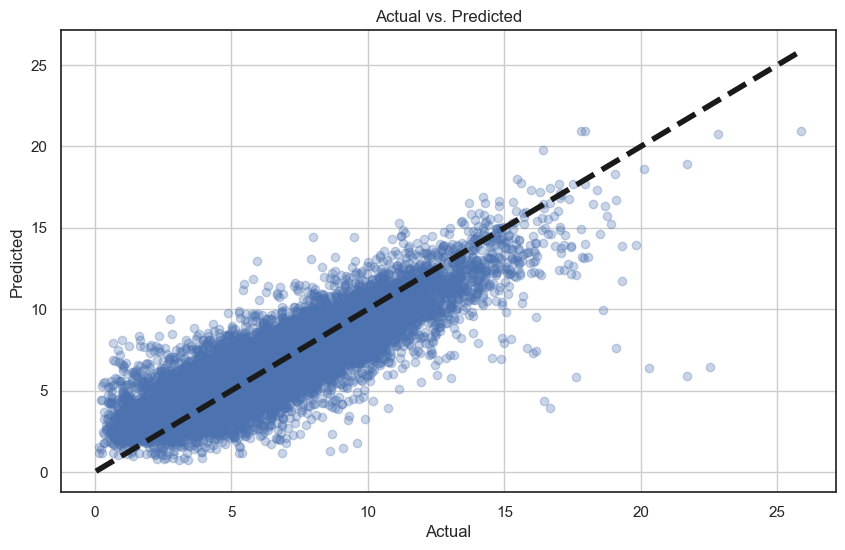

In [58]:
# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Feature')

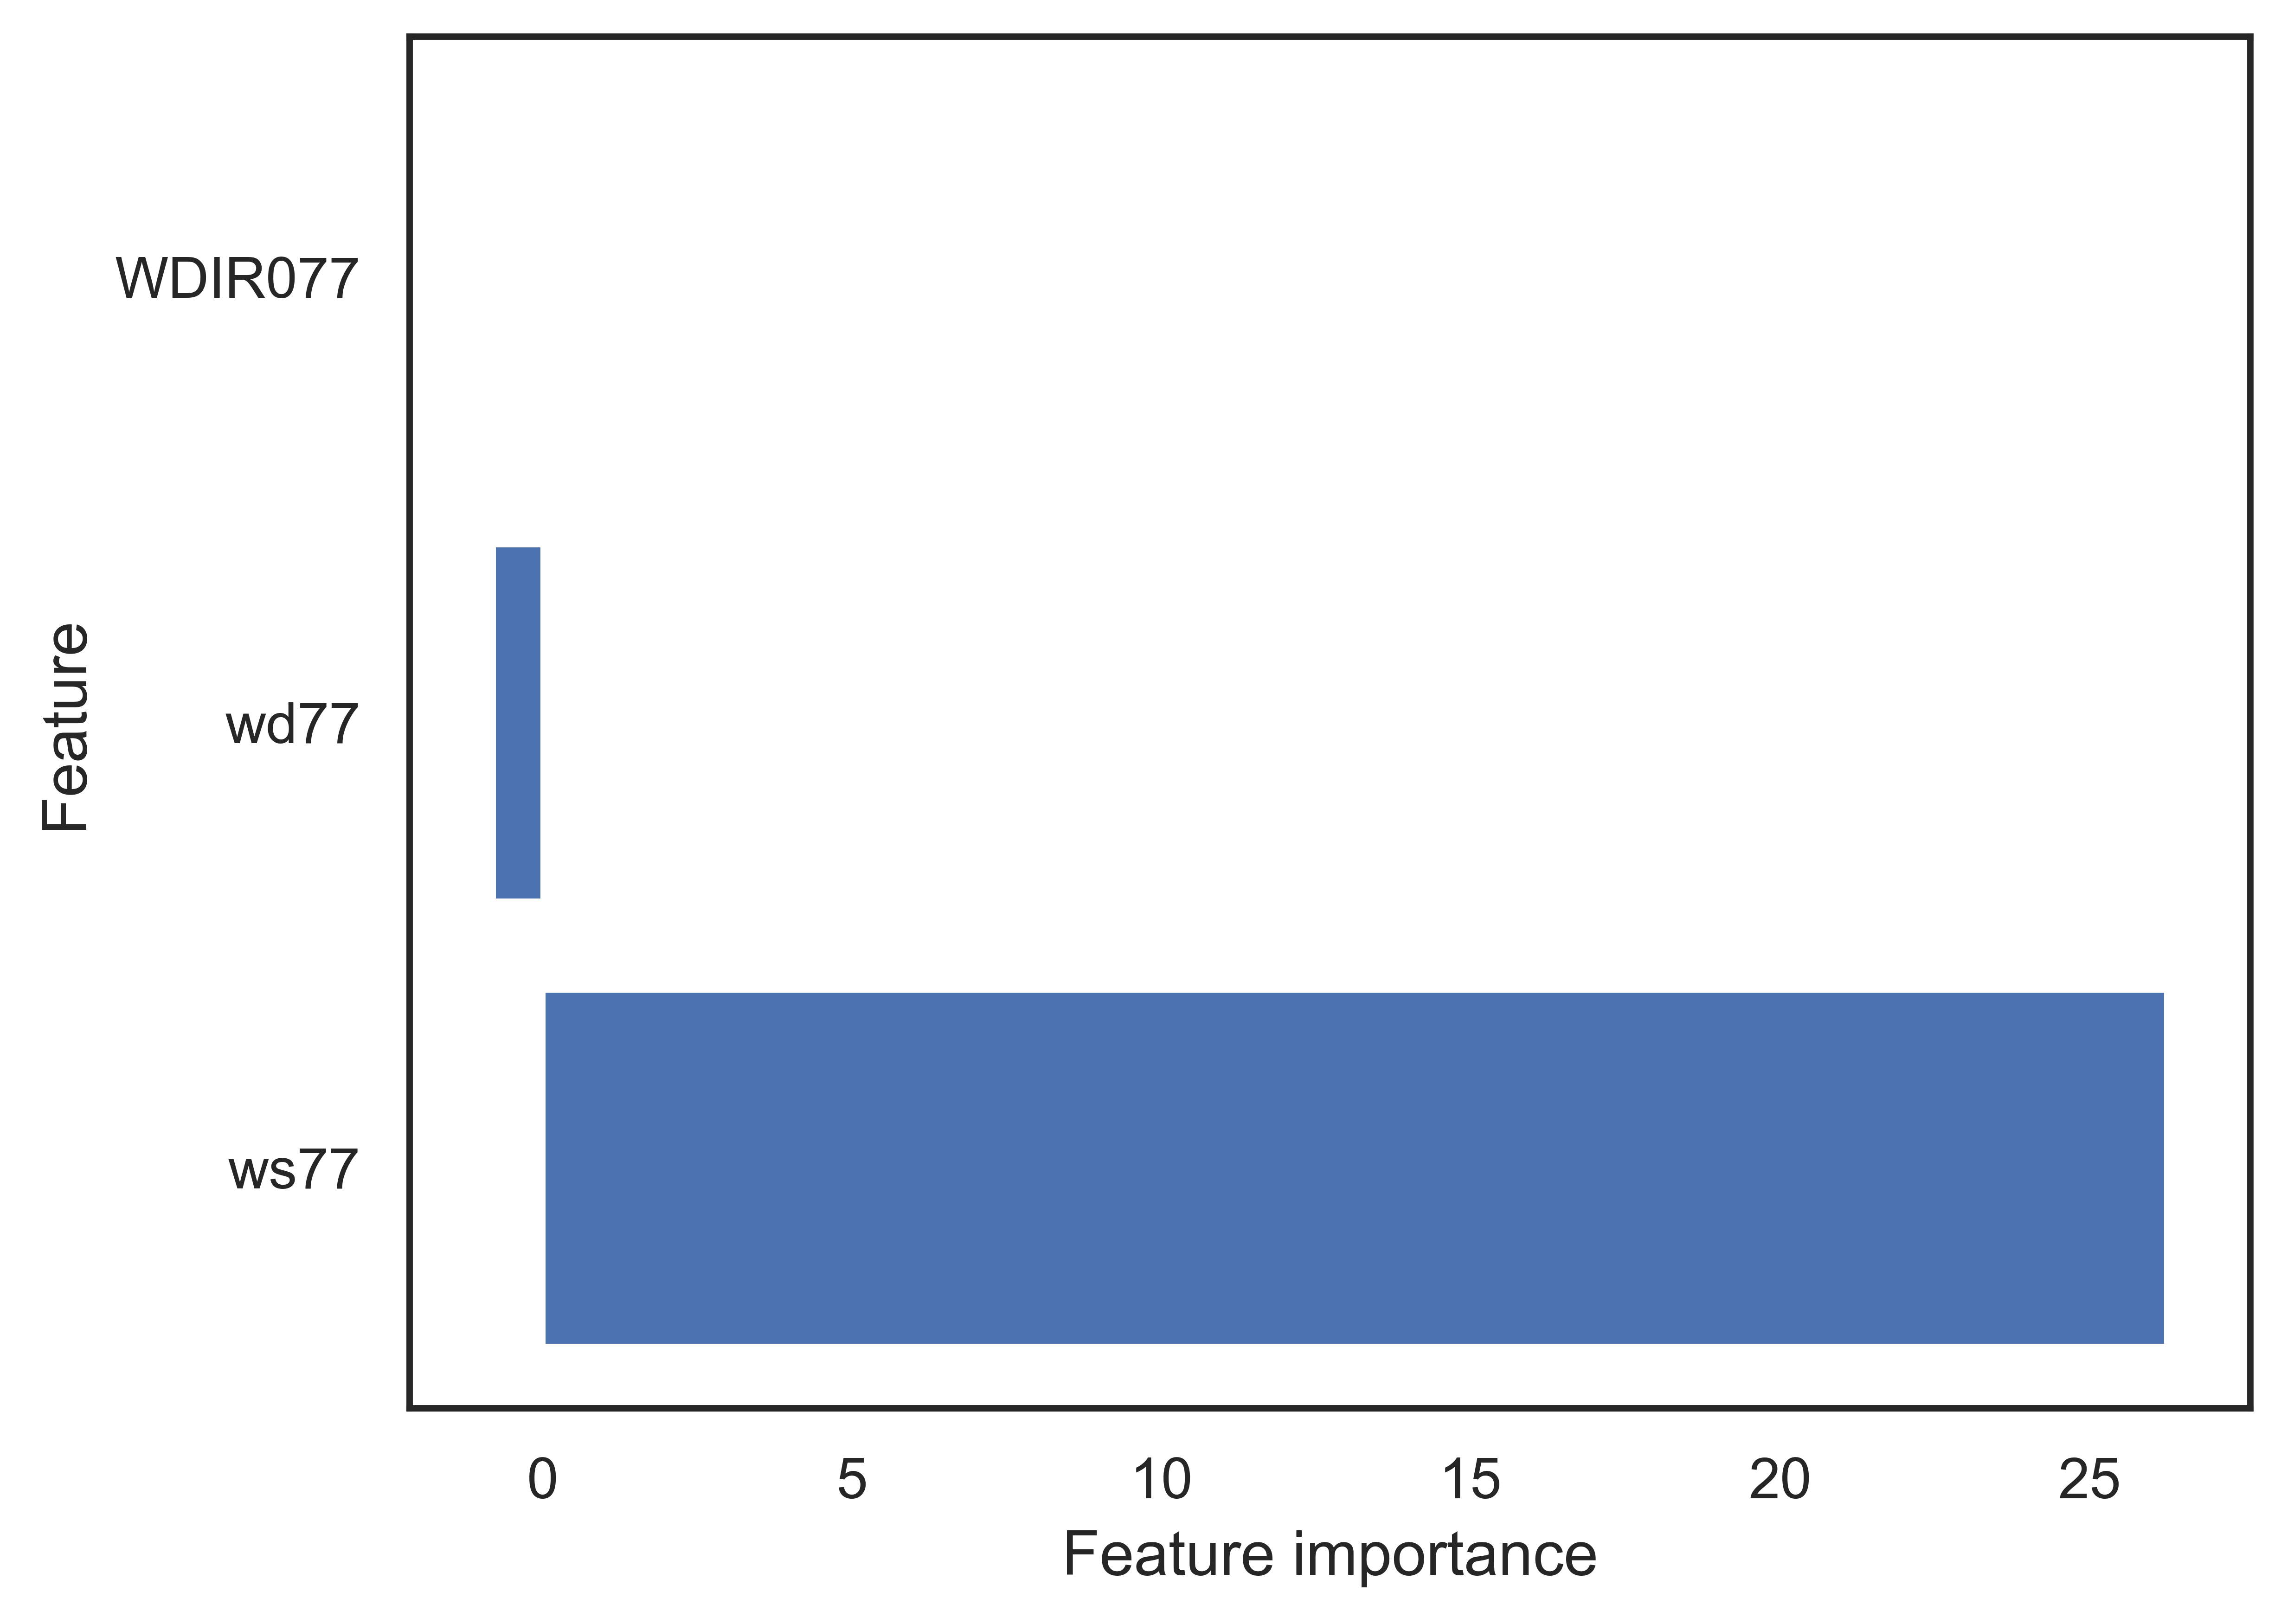

In [59]:
# A coeficent analasys
nfeatures = len(ridge_cv_model.coef_)
plt.figure(dpi = 800)
plt.barh(range(nfeatures), ridge_cv_model.coef_, align='center')
plt.yticks(np.arange(nfeatures), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")